# Section 08 - Performance Analysis - D - 5X Lower atm uncertainty

In [10]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

In [12]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.7 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 4000.0 km
# apoapsis = 550,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(4000.0, 550.0E3, 10.0E3)

In [13]:
# Set path to atmfiles with randomly perturbed atmosphere files.
atmfiles = ['../../../atmdata/Uranus/perturbed/G-01.txt',
            '../../../atmdata/Uranus/perturbed/G-02.txt',
            '../../../atmdata/Uranus/perturbed/G-03.txt',
            '../../../atmdata/Uranus/perturbed/G-04.txt',
            '../../../atmdata/Uranus/perturbed/G-05.txt']

In [14]:
vehicle.setupMonteCarloSimulation(1201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -11.70, 0.10, 0.24, 0.013, 0.5, 0.1, 2400.0, atmSigmaFactor=0.20)

## Small run N = 200

In [15]:
vehicle.runMonteCarlo2(200, '../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD')

RUN #: 1, SAMPLE #: 99, EFPA: -11.74, SIGMA: 0.24, LD: 0.24, APO : 514282.65
RUN #: 2, SAMPLE #: 19, EFPA: -11.84, SIGMA: -0.36, LD: 0.22, APO : 527567.71
RUN #: 3, SAMPLE #: 63, EFPA: -11.64, SIGMA: -0.26, LD: 0.23, APO : 570864.29
RUN #: 4, SAMPLE #: 7, EFPA: -11.70, SIGMA: -0.02, LD: 0.25, APO : 515127.34
RUN #: 5, SAMPLE #: 8, EFPA: -11.95, SIGMA: -0.15, LD: 0.25, APO : 549124.79
RUN #: 6, SAMPLE #: 147, EFPA: -11.65, SIGMA: 0.24, LD: 0.25, APO : 545559.86
RUN #: 7, SAMPLE #: 4, EFPA: -11.81, SIGMA: -0.20, LD: 0.22, APO : 530742.60
RUN #: 8, SAMPLE #: 60, EFPA: -11.65, SIGMA: -0.16, LD: 0.25, APO : 548605.84
RUN #: 9, SAMPLE #: 98, EFPA: -11.61, SIGMA: -0.31, LD: 0.23, APO : 598446.91
RUN #: 10, SAMPLE #: 179, EFPA: -11.65, SIGMA: -0.03, LD: 0.25, APO : 531457.60
RUN #: 11, SAMPLE #: 159, EFPA: -11.48, SIGMA: 0.30, LD: 0.24, APO : 559304.34
RUN #: 12, SAMPLE #: 108, EFPA: -11.74, SIGMA: -0.15, LD: 0.24, APO : 520850.57
RUN #: 13, SAMPLE #: 145, EFPA: -11.81, SIGMA: 0.14, LD: 0.24, 

RUN #: 105, SAMPLE #: 25, EFPA: -11.58, SIGMA: -0.31, LD: 0.24, APO : 509099.63
RUN #: 106, SAMPLE #: 189, EFPA: -11.73, SIGMA: -0.37, LD: 0.24, APO : 551971.90
RUN #: 107, SAMPLE #: 92, EFPA: -11.58, SIGMA: 0.10, LD: 0.24, APO : 515073.19
RUN #: 108, SAMPLE #: 65, EFPA: -11.67, SIGMA: 0.21, LD: 0.26, APO : 529090.20
RUN #: 109, SAMPLE #: 176, EFPA: -11.54, SIGMA: 0.01, LD: 0.23, APO : 527371.53
RUN #: 110, SAMPLE #: 135, EFPA: -11.79, SIGMA: -0.02, LD: 0.23, APO : 591233.63
RUN #: 111, SAMPLE #: 51, EFPA: -11.71, SIGMA: 0.20, LD: 0.23, APO : 539993.72
RUN #: 112, SAMPLE #: 43, EFPA: -11.69, SIGMA: -0.04, LD: 0.24, APO : 557435.50
RUN #: 113, SAMPLE #: 115, EFPA: -11.69, SIGMA: 0.17, LD: 0.24, APO : 491406.73
RUN #: 114, SAMPLE #: 54, EFPA: -11.69, SIGMA: -0.27, LD: 0.24, APO : 534599.91
RUN #: 115, SAMPLE #: 54, EFPA: -11.76, SIGMA: -0.38, LD: 0.24, APO : 507677.15
RUN #: 116, SAMPLE #: 67, EFPA: -11.72, SIGMA: -0.09, LD: 0.24, APO : 590278.56
RUN #: 117, SAMPLE #: 86, EFPA: -11.63, S

In [12]:
p1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/q_stag_max_arr.txt')
h1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/heatload_max_arr.txt')
u1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/apoapsis_raise_DV_arr.txt')

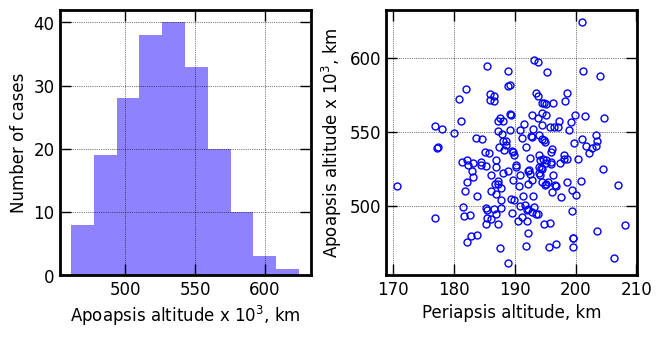

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

## Remove cases which did not capture

In [19]:
del_index1 = np.where(x1 < 0)
del_index1

(array([], dtype=int64),)

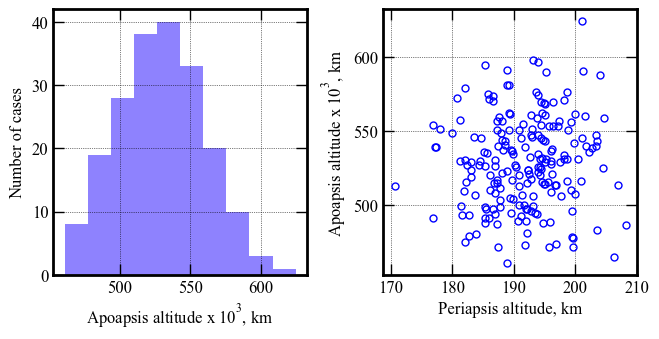

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

In [14]:
print("--------------------------------------------------------------------------------------------------------")

print("Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max")
print("--------------------------------------------------------------------------------------------------------")
print("Apoapsis altitude, km  |    " + str(round(np.min(x1))) + "          " +  str(round(np.percentile(x1, 0.13))) +\
                                                                "         " +  str(round(np.average(x1))) +
                                                                "          " +  str(round(np.percentile(x1, 99.87)))+\
                                                                "          " +  str(round(np.max(x1))))
print("Periapsis altitude, km |       " + str(round(np.min(p1))) + "             " +  str(round(np.percentile(p1, 0.13))) +\
                                                                "            " +  str(round(np.average(p1))) +
                                                                "             " +  str(round(np.percentile(p1, 99.87)))+\
                                                                "             " +  str(round(np.max(p1))))
print("Peak deceleration, g   |       " + str(round(np.min(y1), 2)) + "           " +  str(round(np.percentile(y1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(y1), 2)) +
                                                                "            " +  str(round(np.percentile(y1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(y1), 2)))

print("Peak heat rate, W/cm2  |       " + str(round(np.min(z1))) + "           " +  str(round(np.percentile(z1, 0.13))) +\
                                                                "           " +  str(round(np.average(z1))) +
                                                                "            " +  str(round(np.percentile(z1, 99.87)))+\
                                                                "            " +  str(round(np.max(z1))))

print("Peak heat load, kJ/cm2 |        " + str(round(np.min(h1))) + "            " +  str(round(np.percentile(h1, 0.13))) +\
                                                                "            " +  str(round(np.average(h1))) +
                                                                "             " +  str(round(np.percentile(h1, 99.87)))+\
                                                                "             " +  str(round(np.max(h1))))
print("Periapsis raise dV, m/s|      " + str(round(np.min(u1), 2)) + "          " +  str(round(np.percentile(u1, 0.13), 2)) +\
                                                                "          " +  str(round(np.average(u1), 2)) +
                                                                "           " +  str(round(np.percentile(u1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(u1), 2)))

print("Apoapsis corr. dV, m/s |     " + str(round(np.min(v1), 2)) + "         " +  str(round(np.percentile(v1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(v1), 2)) +
                                                                "          " +  str(round(np.percentile(v1, 99.87), 2))+\
                                                                "          " +  str(round(np.max(v1), 2)))

print("--------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------
Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max
--------------------------------------------------------------------------------------------------------
Apoapsis altitude, km  |    461172          462172         529271          617708          624429
Periapsis altitude, km |       171             172            192             208             208
Peak deceleration, g   |       7.13           7.15           8.0            9.42           9.52
Peak heat rate, W/cm2  |       1604           1610           1744            1862            1865
Peak heat load, kJ/cm2 |        209            210            221             229             229
Periapsis raise dV, m/s|      56.23          56.83          65.52           73.59           73.81
Apoapsis corr. dV, m/s |     -54.23         -49.7           19.01          84.38          85.5
-------------

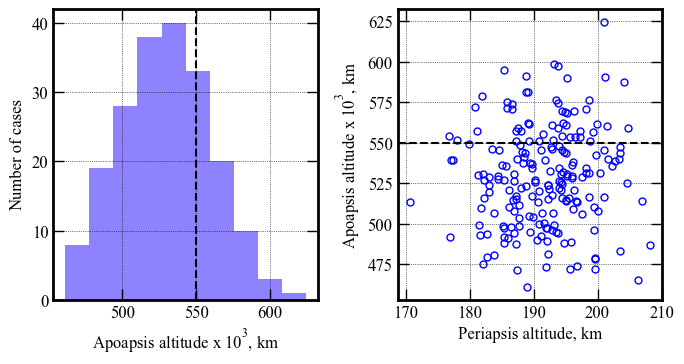

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].axvline(x=550.0, linewidth=1.5, color='k', linestyle='dashed')
axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')
axes[1].axhline(y=550.0, linewidth=1.5, color='k', linestyle='dashed')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis-XD.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis-XD.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis-XD.eps', dpi=300,bbox_inches='tight')


plt.show()

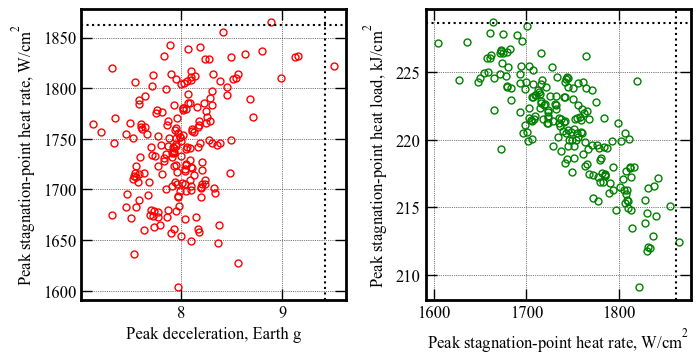

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].axhline(y=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].axvline(x=np.percentile(y1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=12)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].axhline(y=np.percentile(h1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].axvline(x=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load-XD.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load-XD.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load-XD.eps', dpi=300,bbox_inches='tight')


plt.show()

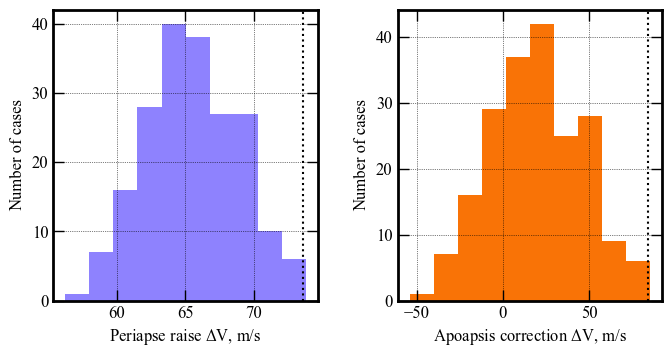

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)


axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].axvline(x=np.percentile(u1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].hist(v1, bins=10, color='xkcd:orange')
axes[1].axvline(x=np.percentile(v1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=12)
axes[1].set_ylabel('Number of cases', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers-XD.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers-XD.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers-XD.eps', dpi=300,bbox_inches='tight')


plt.show()

In [3]:
def percent_between(a, lower, upper, closed_left=True, closed_right=True):
    """
    Finds the percentage of values between a range for a numpy array

    Parameters
    ----------
    a: np.ndarray
      numpy array to calculate percentage
    lower: int, float
      lower bound
    upper: int, float
      upper bound
    closed_left:
      closed left bound ( > vs >= )
    closed_right:
      closed right bound ( < vs <= )
    """
    l = np.greater if not closed_left else np.greater_equal
    r = np.less if not closed_right else np.less_equal

    c = l(a, lower) & r(a, upper)
    return np.count_nonzero(c) / float(a.size)

In [5]:
p1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/q_stag_max_arr.txt')
h1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/heatload_max_arr.txt')
u1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXD/apoapsis_raise_DV_arr.txt')

In [6]:
percent_between(x1, -3e9, 0)

0.0

In [7]:
percent_between(x1, 500e3, 600e3)

0.79

In [8]:
percent_between(x1, 450e3, 650e3)

1.0

In [9]:
percent_between(x1, 350e3, 750e3)

1.0